In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error
from math import sqrt
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import SimpleRNN, Dense,BatchNormalization,Dropout
from tensorflow.keras.layers import Bidirectional,LSTM, Dense
from tensorflow.keras.layers import GRU,Dense
from keras.callbacks import EarlyStopping
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data=pd.read_csv("C:/Users/kumar/Desktop/final7thsempr/madhya_pradesh.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 6 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Date                                              1301 non-null   object
 1   No. of Facilitator Registered                     1301 non-null   int64 
 2   No. of Sabha Scheduled                            1301 non-null   int64 
 3   No. of Facilitator Feedback Submitted             1301 non-null   int64 
 4   No. of Panchayats with Sabha Images               1301 non-null   int64 
 5   No. of Panchayats with Public Information Images  1301 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 61.1+ KB


In [4]:
print(data)

            Date  No. of Facilitator Registered  No. of Sabha Scheduled  \
0     01-09-2020                              0                       0   
1     02-09-2020                              0                       0   
2     03-09-2020                              0                       0   
3     04-09-2020                              0                       0   
4     05-09-2020                              0                       0   
...          ...                            ...                     ...   
1296  20-03-2024                          27717                   48336   
1297  21-03-2024                          27889                   48405   
1298  22-03-2024                          28016                   48465   
1299  23-03-2024                          28148                   48482   
1300  24-03-2024                          28169                   48491   

      No. of Facilitator Feedback Submitted  \
0                                         0   
1    

<Axes: xlabel='Date', ylabel='Values'>

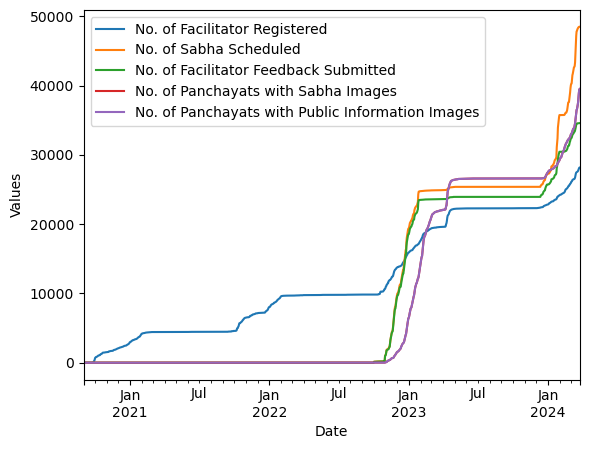

In [5]:
data['Date']=pd.to_datetime(data['Date'],format="%d-%m-%Y")
data.set_index('Date', inplace=True)
data.plot(ylabel='Values')

In [6]:
df=data.resample('H').interpolate(method='linear')
df.columns = ['c1','c2','c3','c4','c5']
print(df)

                            c1         c2       c3            c4            c5
Date                                                                          
2020-09-01 00:00:00      0.000      0.000      0.0      0.000000      0.000000
2020-09-01 01:00:00      0.000      0.000      0.0      0.000000      0.000000
2020-09-01 02:00:00      0.000      0.000      0.0      0.000000      0.000000
2020-09-01 03:00:00      0.000      0.000      0.0      0.000000      0.000000
2020-09-01 04:00:00      0.000      0.000      0.0      0.000000      0.000000
...                        ...        ...      ...           ...           ...
2024-03-23 20:00:00  28165.500  48489.500  34580.0  39485.833333  39485.833333
2024-03-23 21:00:00  28166.375  48489.875  34580.0  39488.375000  39488.375000
2024-03-23 22:00:00  28167.250  48490.250  34580.0  39490.916667  39490.916667
2024-03-23 23:00:00  28168.125  48490.625  34580.0  39493.458333  39493.458333
2024-03-24 00:00:00  28169.000  48491.000  34580.0  

In [7]:
zero_count_c1 = (df['c1'] == 0).sum()
zero_count_c2 = (df['c2'] == 0).sum()
print(zero_count_c1)
print(zero_count_c2)

481
18241


In [8]:
df_c1=df['c1'][zero_count_c1:]
df_c2=df['c2'][zero_count_c2:]

c1

In [9]:
print(df_c1)

Date
2020-09-21 01:00:00        0.041667
2020-09-21 02:00:00        0.083333
2020-09-21 03:00:00        0.125000
2020-09-21 04:00:00        0.166667
2020-09-21 05:00:00        0.208333
                           ...     
2024-03-23 20:00:00    28165.500000
2024-03-23 21:00:00    28166.375000
2024-03-23 22:00:00    28167.250000
2024-03-23 23:00:00    28168.125000
2024-03-24 00:00:00    28169.000000
Freq: H, Name: c1, Length: 30720, dtype: float64


<Axes: xlabel='Date', ylabel='values'>

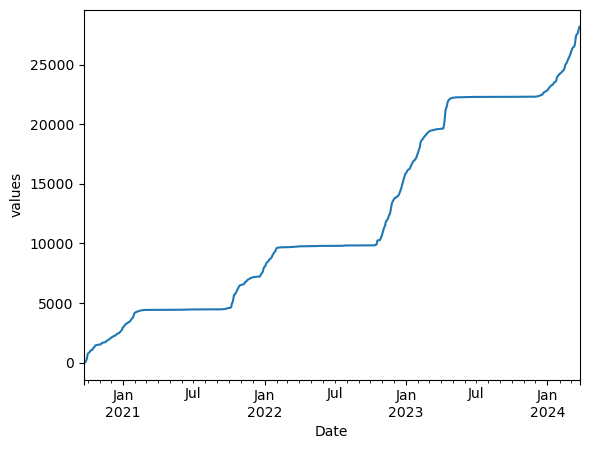

In [10]:
df_c1.plot(ylabel="values")

In [11]:
df_c1.describe()

count    30720.000000
mean     12149.461214
std       7810.738383
min          0.041667
25%       4469.000000
50%       9799.000000
75%      22241.020833
max      28169.000000
Name: c1, dtype: float64

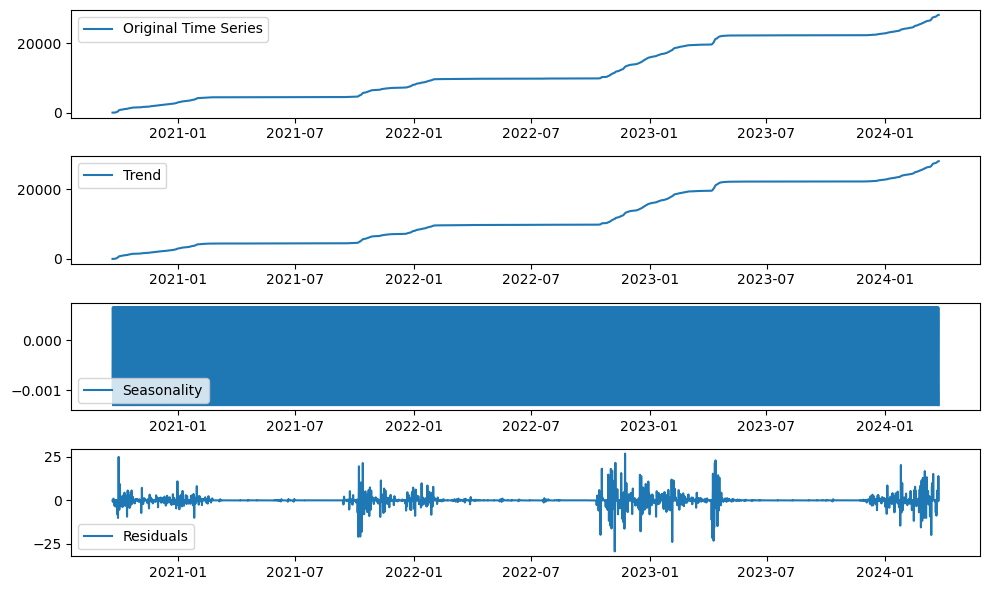

In [12]:
# Perform time series decomposition
decomposition = seasonal_decompose(df_c1, model='additive')

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(df_c1, label='Original Time Series')
plt.legend()

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend()

# Plot the residual component
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
# Check for stationarity using the Augmented Dickey-Fuller test
result = adfuller(df_c1)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 1.1211721406439972
p-value: 0.9953933285440554


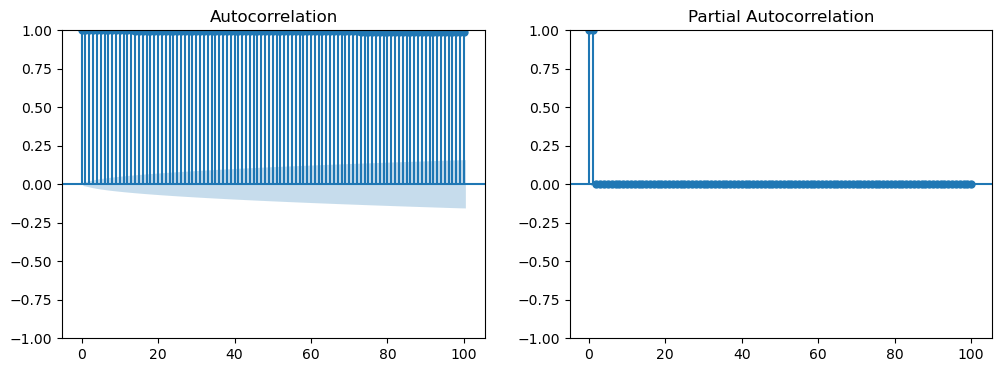

In [14]:
# Plot Autocorrelation and Partial Autocorrelation Functions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_c1, lags=100, ax=ax1)
plot_pacf(df_c1, lags=100, ax=ax2)
plt.show()

In [15]:
df_c1_diff=df_c1.diff(periods=1).dropna()

In [16]:
print(df_c1_diff)

Date
2020-09-21 02:00:00    0.041667
2020-09-21 03:00:00    0.041667
2020-09-21 04:00:00    0.041667
2020-09-21 05:00:00    0.041667
2020-09-21 06:00:00    0.041667
                         ...   
2024-03-23 20:00:00    0.875000
2024-03-23 21:00:00    0.875000
2024-03-23 22:00:00    0.875000
2024-03-23 23:00:00    0.875000
2024-03-24 00:00:00    0.875000
Freq: H, Name: c1, Length: 30719, dtype: float64


<Axes: xlabel='Date', ylabel='Diff Values'>

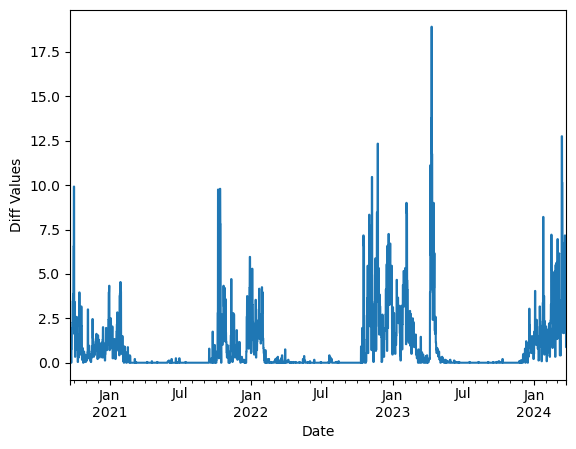

In [17]:
df_c1_diff.plot(ylabel="Diff Values")

In [18]:
df_c1_diff.describe()

count    30719.000000
mean         0.916988
std          1.818854
min          0.000000
25%          0.000000
50%          0.041667
75%          1.083333
max         18.916667
Name: c1, dtype: float64

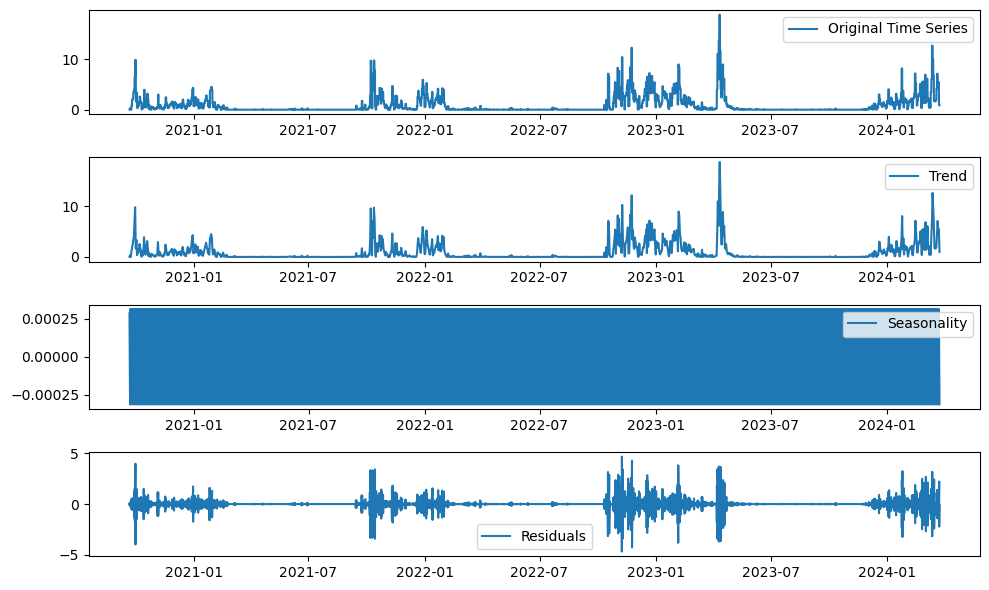

In [19]:
# Perform time series decomposition
decomposition = seasonal_decompose(df_c1_diff, model='additive')

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(df_c1_diff, label='Original Time Series')
plt.legend()

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend()

# Plot the residual component
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()


In [20]:
# Check for stationarity using the Augmented Dickey-Fuller test
result = adfuller(df_c1_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -9.8135627489403
p-value: 5.574002866113912e-17


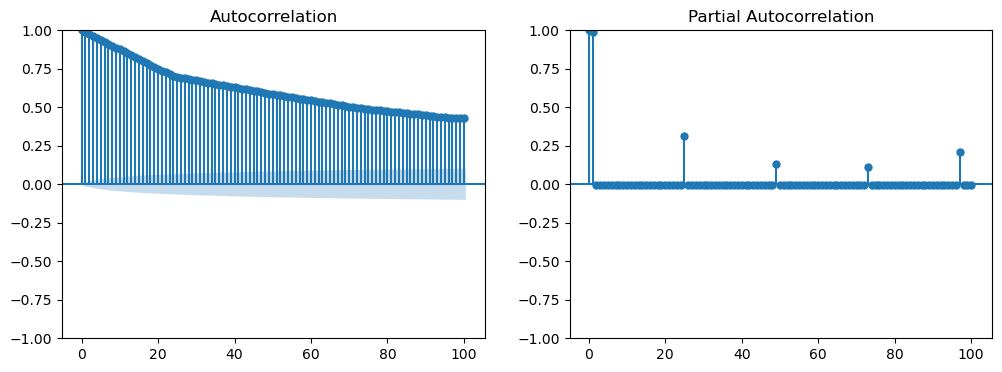

In [21]:
# Plot Autocorrelation and Partial Autocorrelation Functions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_c1_diff, lags=100, ax=ax1)
plot_pacf(df_c1_diff, lags=100, ax=ax2)
plt.show()

In [22]:
df_c1_diff_v=df_c1_diff.values

In [23]:
sequence_length = 100
evalue=200

In [24]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
ts_data_scaled = scaler.fit_transform(df_c1_diff_v.reshape(-1, 1))

# Define sequence length
sequence_length = 100

# Create sequences for training
X, y = [], []
for i in range(len(ts_data_scaled) - sequence_length):
    X.append(ts_data_scaled[i:i + sequence_length])
    y.append(ts_data_scaled[i + sequence_length])

X, y = np.array(X), np.array(y)

# Split the data into training, testing, and validation sets
# Train split: 60%, Test split: 20%, Validation split: 20%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, shuffle=False)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Reshape the data for LSTM/GRU input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

In [25]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(18371, 100, 1)
(6124, 100, 1)
(6124, 100, 1)


In [26]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the RNN model
model_rnn_c1 = Sequential()
model_rnn_c1.add(SimpleRNN(100, activation='relu', input_shape=(sequence_length,1)))
model_rnn_c1.add(Dense(1))
model_rnn_c1.compile(optimizer='adam', loss='mse')
print("RNN\n")
model_rnn_c1.summary()
print("\n")

# Train the model with early stopping
history_model_rnn_c1 = model_rnn_c1.fit(X_train, y_train, 
                                        epochs=evalue, 
                                        batch_size=32,
                                        validation_data=(X_val, y_val), 
                                        verbose=2,
                                        callbacks=[early_stopping])


RNN

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10301 (40.24 KB)
Trainable params: 10301 (40.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
575/575 - 11s - loss: 2.0463e-04 - val_loss: 2.3543e-04 - 11s/epoch - 20ms/step
Epoch 2/200
575/575 - 10s - loss: 1.4360e-04 - val_loss: 2.3730e-04 - 10s/epoch - 17ms/step
Epoch 3/200
575/575 - 10s - loss: 1.3808e-04 - val_loss: 2.3101e-04 - 10s/epoch - 17ms/step
Epoch 4/200
575/575 - 10s - loss: 1.4139e-04 - val_loss: 2.6265e-04 - 10s/epoch - 17ms/step
Epoch 5/200
575/575 - 10s - loss: 1.3587e

192/192 [==============================] - 2s 7ms/step


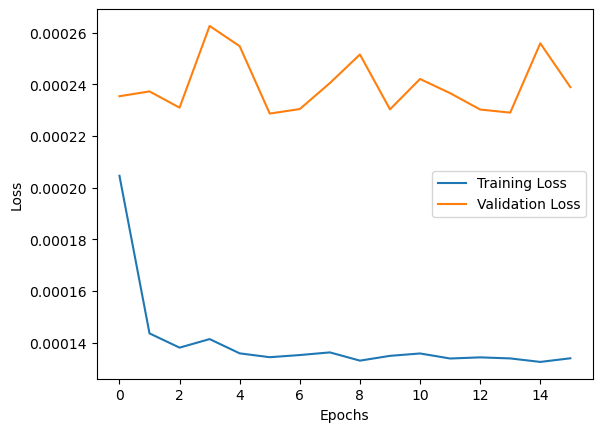

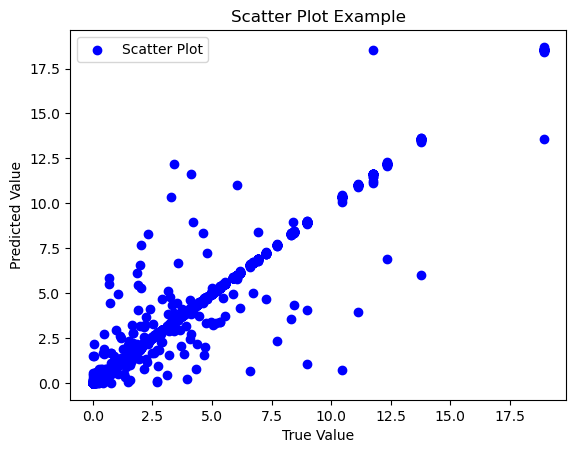

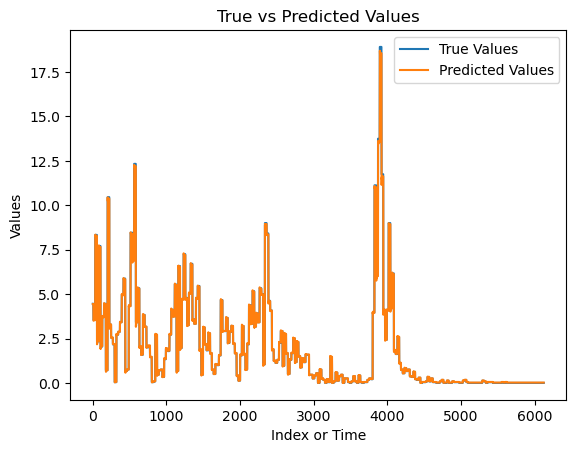

Performance on Different Metrics
RMSE: 0.4414247937316643
MAE: 0.06990478905553872
MSE: 0.19485584852104237
R2: 0.9731950516466384


In [27]:
# Make predictions on the test set
y_pred_scaled = model_rnn_c1.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_rnn_c1 = {}
p_rnn_c1['RMSE'] = rmse
p_rnn_c1['MAE'] = mae
p_rnn_c1['MSE'] = mse
p_rnn_c1['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_rnn_c1.history['loss'], label='Training Loss')
plt.plot(history_model_rnn_c1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
# Add labels and title
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
# Add a legend if needed
plt.legend()
# Display the plot
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
# Line plot for predicted values (y_pred)
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
# Adding labels and title
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
# Show the plot
plt.show()

print("Performance on Different Metrics")
# Printing performance metrics of the model
for key, value in p_rnn_c1.items():
    print(f'{key}: {value}')

In [28]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the LSTM model
model_lstm_c1 = Sequential()
model_lstm_c1.add(LSTM(100, activation='relu', input_shape=(sequence_length,1)))
model_lstm_c1.add(Dense(1))
model_lstm_c1.compile(optimizer='adam', loss='mse')
print("LSTM\n")
model_lstm_c1.summary()
print("\n")

# Train the model with early stopping
history_model_lstm_c1 = model_lstm_c1.fit(X_train, y_train, 
                                          epochs=evalue, 
                                          batch_size=32,
                                          validation_data=(X_val, y_val), 
                                          verbose=2,
                                          callbacks=[early_stopping])


LSTM

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
575/575 - 34s - loss: 4.7376e-04 - val_loss: 4.2257e-04 - 34s/epoch - 58ms/step
Epoch 2/200
575/575 - 34s - loss: 2.2997e-04 - val_loss: 3.1140e-04 - 34s/epoch - 59ms/step
Epoch 3/200
575/575 - 34s - loss: 1.8765e-04 - val_loss: 2.8471e-04 - 34s/epoch - 59ms/step
Epoch 4/200
575/575 - 34s - loss: 1.6677e-04 - val_loss: 2.5970e-04 - 34s/epoch - 59ms/step
Epoch 5/200
575/575 - 34s - loss: 1.

192/192 [==============================] - 4s 19ms/step


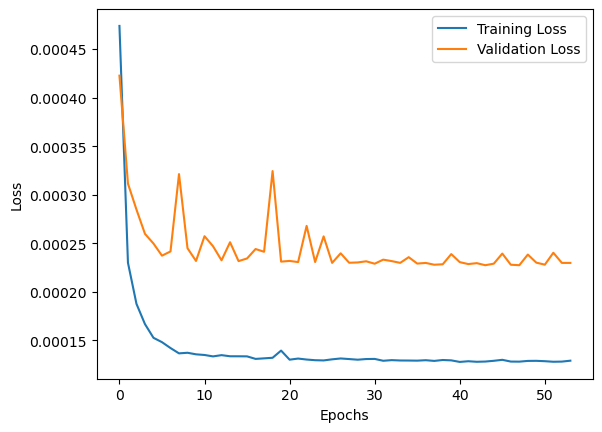

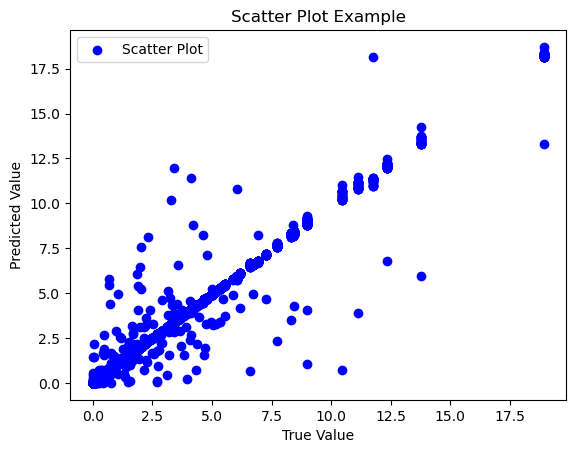

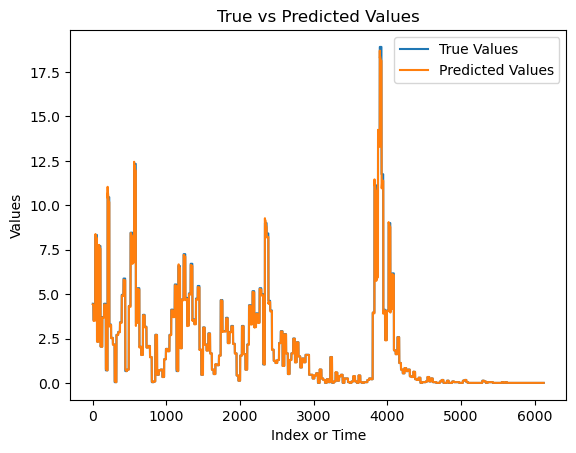

Performance on Different Metrics
RMSE: 0.44146463613196935
MAE: 0.07332896330656889
MSE: 0.1948910249551321
R2: 0.973190212672052


In [29]:
# Make predictions on the test set
y_pred_scaled = model_lstm_c1.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_lstm_c1 = {}
p_lstm_c1['RMSE'] = rmse
p_lstm_c1['MAE'] = mae
p_lstm_c1['MSE'] = mse
p_lstm_c1['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_lstm_c1.history['loss'], label='Training Loss')
plt.plot(history_model_lstm_c1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
# Add labels and title
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
# Add a legend if needed
plt.legend()
# Display the plot
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
# Line plot for predicted values (y_pred)
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
# Adding labels and title
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
# Show the plot
plt.show()

print("Performance on Different Metrics")
# Printing performance metrics of the model
for key, value in p_lstm_c1.items():
    print(f'{key}: {value}')

In [30]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the BiLSTM model
model_bilstm_c1 = Sequential()
model_bilstm_c1.add(Bidirectional(LSTM(100, activation='relu'), input_shape=(sequence_length,1)))
model_bilstm_c1.add(Dense(1))
model_bilstm_c1.compile(optimizer='adam', loss='mse')
print("BiLSTM\n")
model_bilstm_c1.summary()
print("\n")

# Train the model with early stopping
history_model_bilstm_c1 = model_bilstm_c1.fit(X_train, y_train, 
                                              epochs=evalue, 
                                              batch_size=32,
                                              validation_data=(X_val, y_val), 
                                              verbose=2,
                                              callbacks=[early_stopping])


BiLSTM

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 200)               81600     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 81801 (319.54 KB)
Trainable params: 81801 (319.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
575/575 - 50s - loss: 5.4294e-04 - val_loss: 6.0859e-04 - 50s/epoch - 87ms/step
Epoch 2/200
575/575 - 47s - loss: 2.3608e-04 - val_loss: 3.2449e-04 - 47s/epoch - 81ms/step
Epoch 3/200
575/575 - 48s - loss: 1.8719e-04 - val_loss: 2.9300e-04 - 48s/epoch - 84ms/step
Epoch 4/200
575/575 - 47s - loss: 1.7707e-04 - val_loss: 3.2

192/192 [==============================] - 4s 22ms/step


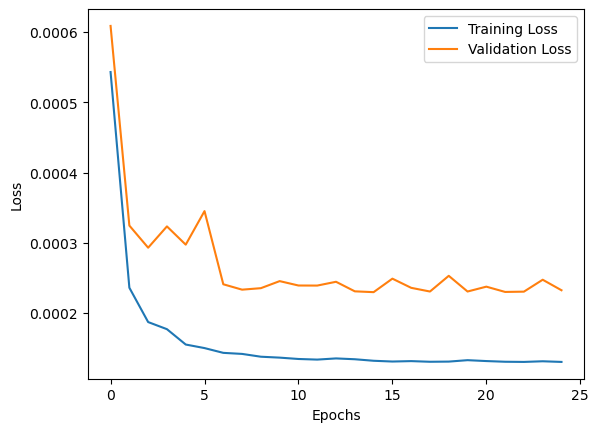

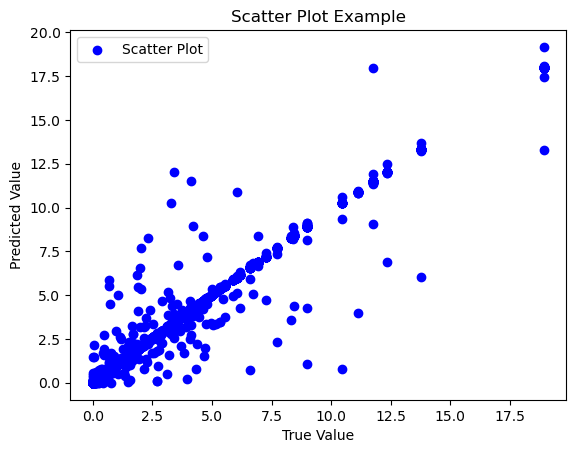

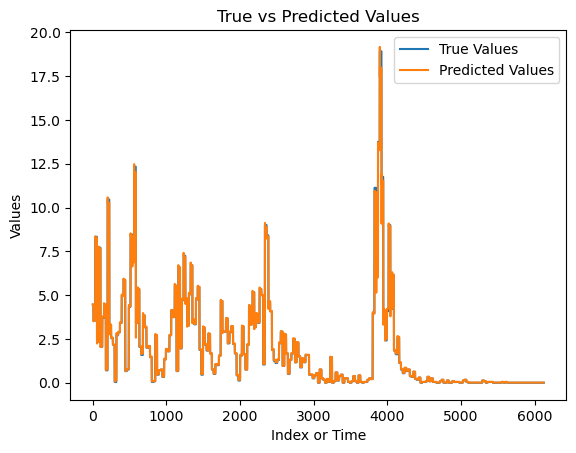

Performance on Different Metrics
RMSE: 0.4457803573847824
MAE: 0.07821122354731642
MSE: 0.1987201270301043
R2: 0.9726634700356959


In [31]:
# Make predictions on the test set
y_pred_scaled = model_bilstm_c1.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_bilstm_c1 = {}
p_bilstm_c1['RMSE'] = rmse
p_bilstm_c1['MAE'] = mae
p_bilstm_c1['MSE'] = mse
p_bilstm_c1['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_bilstm_c1.history['loss'], label='Training Loss')
plt.plot(history_model_bilstm_c1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
# Add labels and title
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
# Add a legend if needed
plt.legend()
# Display the plot
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
# Line plot for predicted values (y_pred)
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
# Adding labels and title
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
# Show the plot
plt.show()

print("Performance on Different Metrics")
# Printing performance metrics of the model
for key, value in p_bilstm_c1.items():
    print(f'{key}: {value}')

In [32]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the GRU model
model_gru_c1 = Sequential()
model_gru_c1.add(GRU(100, activation='relu', input_shape=(sequence_length, 1)))
model_gru_c1.add(Dense(1))
model_gru_c1.compile(optimizer='adam', loss='mse')
print("GRU\n")
model_gru_c1.summary()
print("\n")

# Train the model with early stopping
history_model_gru_c1 = model_gru_c1.fit(X_train, y_train, 
                                        epochs=evalue, 
                                        batch_size=32,
                                        validation_data=(X_val, y_val), 
                                        verbose=2,
                                        callbacks=[early_stopping])


GRU

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100)               30900     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 31001 (121.10 KB)
Trainable params: 31001 (121.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
575/575 - 34s - loss: 3.3895e-04 - val_loss: 2.9394e-04 - 34s/epoch - 59ms/step
Epoch 2/200
575/575 - 31s - loss: 1.5807e-04 - val_loss: 2.8648e-04 - 31s/epoch - 54ms/step
Epoch 3/200
575/575 - 31s - loss: 1.4200e-04 - val_loss: 2.4645e-04 - 31s/epoch - 54ms/step
Epoch 4/200
575/575 - 31s - loss: 1.3710e-04 - val_loss: 2.3538e-04 - 31s/epoch - 53ms/step
Epoch 5/200
575/575 - 31s - loss: 1.3

192/192 [==============================] - 3s 15ms/step


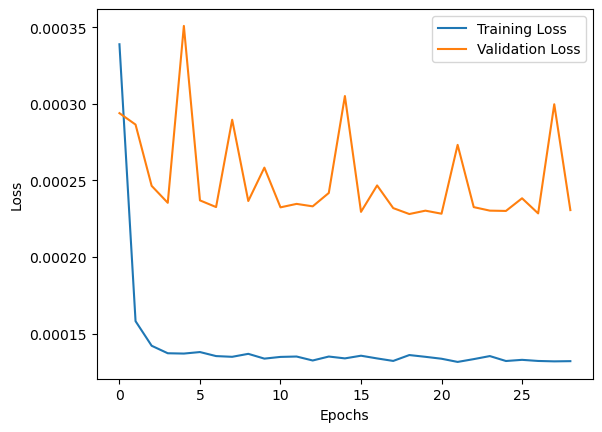

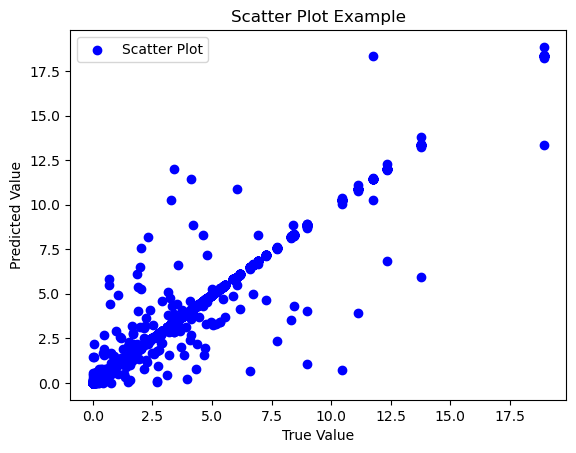

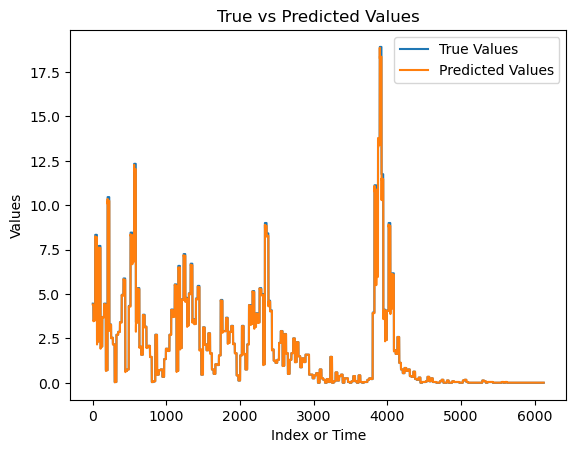

Performance on Different Metrics
RMSE: 0.4421090320544449
MAE: 0.07225904653316481
MSE: 0.1954603962241182
R2: 0.9731118882718612


In [33]:
# Make predictions on the test set
y_pred_scaled = model_gru_c1.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_gru_c1 = {}
p_gru_c1['RMSE'] = rmse
p_gru_c1['MAE'] = mae
p_gru_c1['MSE'] = mse
p_gru_c1['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_gru_c1.history['loss'], label='Training Loss')
plt.plot(history_model_gru_c1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
plt.legend()
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Printing performance metrics of the model
print("Performance on Different Metrics")
for key, value in p_gru_c1.items():
    print(f'{key}: {value}')

In [34]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the hybrid RNN-LSTM model
model_hybrid_rnn_lstm = Sequential()
model_hybrid_rnn_lstm.add(SimpleRNN(100, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model_hybrid_rnn_lstm.add(LSTM(100, activation='relu'))
model_hybrid_rnn_lstm.add(Dense(1))
model_hybrid_rnn_lstm.compile(optimizer='adam', loss='mse')

print("Hybrid RNN-LSTM\n")
model_hybrid_rnn_lstm.summary()
print("\n")

# Train the model with early stopping
history_model_hybrid_rnn_lstm = model_hybrid_rnn_lstm.fit(X_train, y_train, 
                                                          epochs=evalue, 
                                                          batch_size=32,
                                                          validation_data=(X_val, y_val), 
                                                          verbose=2,
                                                          callbacks=[early_stopping])


Hybrid RNN-LSTM

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 100, 100)          10200     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 90701 (354.30 KB)
Trainable params: 90701 (354.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
575/575 - 55s - loss: 2.7345e-04 - val_loss: 3.3979e-04 - 55s/epoch - 96ms/step
Epoch 2/200
575/575 - 54s - loss: 1.7554e-04 - val_loss: 2.3832e-04 - 54s/epoch - 93ms/step
Epoch 3/200
575/575 - 52s - loss: 1.5301e-04 - val_loss: 2.5234e-04 - 52s/epo

192/192 [==============================] - 5s 26ms/step


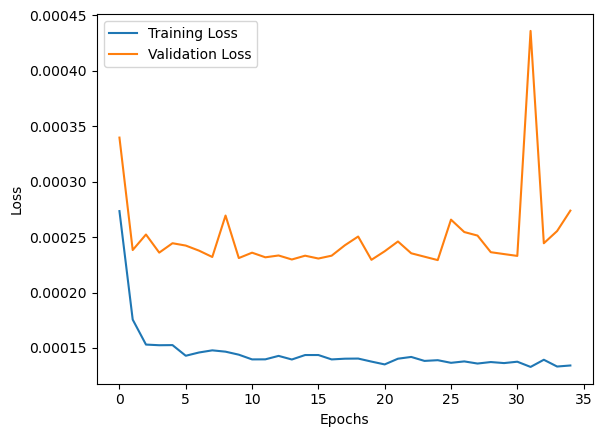

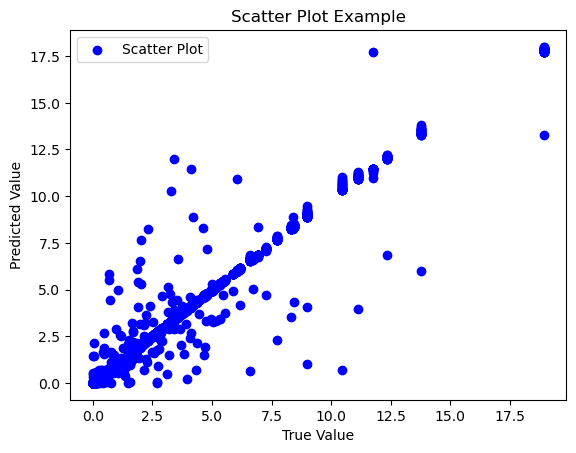

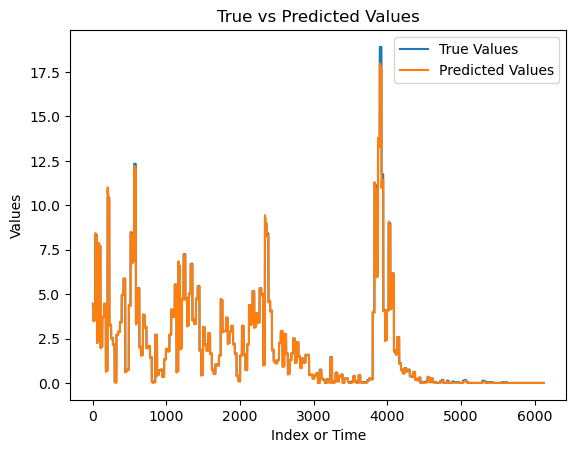

Performance on Different Metrics
RMSE: 0.44490371439636495
MAE: 0.07844684964224599
MSE: 0.19793931508368226
R2: 0.9727708808424865


In [35]:
# Make predictions on the test set
y_pred_scaled = model_hybrid_rnn_lstm.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_hybrid_rnn_lstm = {}
p_hybrid_rnn_lstm['RMSE'] = rmse
p_hybrid_rnn_lstm['MAE'] = mae
p_hybrid_rnn_lstm['MSE'] = mse
p_hybrid_rnn_lstm['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_hybrid_rnn_lstm.history['loss'], label='Training Loss')
plt.plot(history_model_hybrid_rnn_lstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
plt.legend()
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Printing performance metrics of the model
print("Performance on Different Metrics")
for key, value in p_hybrid_rnn_lstm.items():
    print(f'{key}: {value}')

In [36]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the hybrid RNN-BiLSTM model
model_hybrid_rnn_bilstm = Sequential()
model_hybrid_rnn_bilstm.add(SimpleRNN(100, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model_hybrid_rnn_bilstm.add(Bidirectional(LSTM(100, activation='relu')))
model_hybrid_rnn_bilstm.add(Dense(1))
model_hybrid_rnn_bilstm.compile(optimizer='adam', loss='mse')

print("Hybrid RNN-BiLSTM\n")
model_hybrid_rnn_bilstm.summary()
print("\n")

# Train the model with early stopping
history_model_hybrid_rnn_bilstm = model_hybrid_rnn_bilstm.fit(X_train, y_train, 
                                                              epochs=evalue, 
                                                              batch_size=32,
                                                              validation_data=(X_val, y_val), 
                                                              verbose=2,
                                                              callbacks=[early_stopping])


Hybrid RNN-BiLSTM

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 100, 100)          10200     
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               160800    
 onal)                                                           
                                                                 
 dense_5 (Dense)             (None, 1)                 201       
                                                                 
Total params: 171201 (668.75 KB)
Trainable params: 171201 (668.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
575/575 - 76s - loss: 3.3635e-04 - val_loss: 4.0781e-04 - 76s/epoch - 132ms/step
Epoch 2/200
575/575 - 74s - loss: 1.7302e-04 - val_loss: 9.2444e-04 - 74s/epoch - 128ms/step
Epoch

192/192 [==============================] - 6s 30ms/step


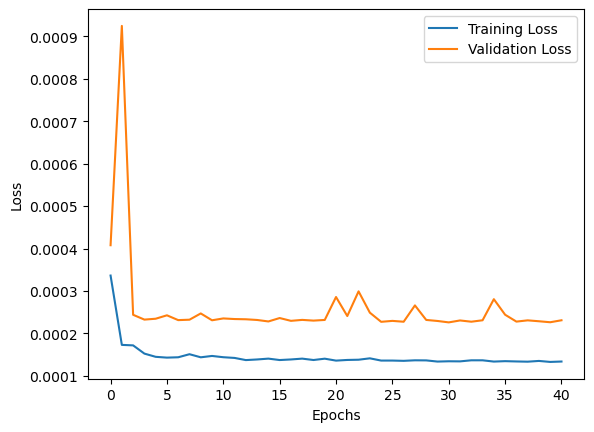

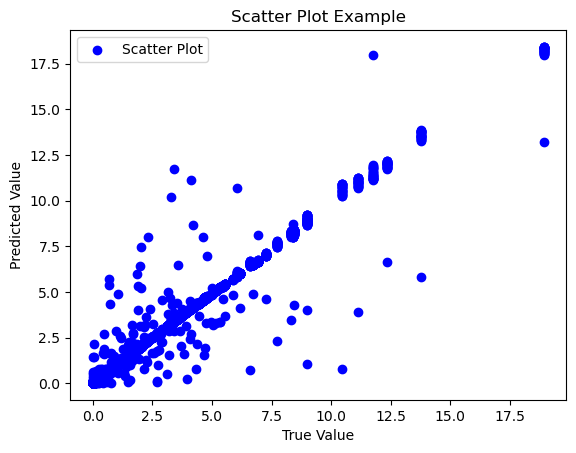

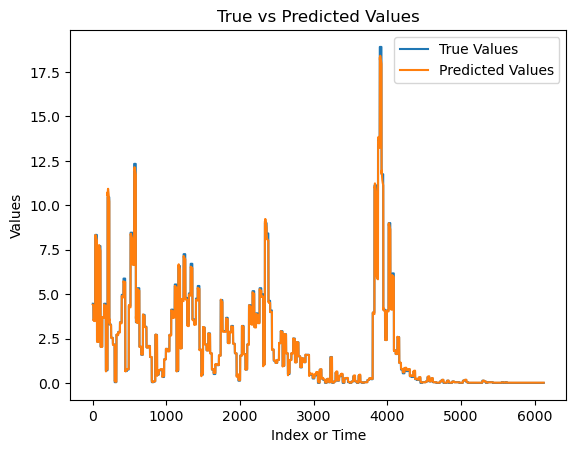

Performance on Different Metrics
RMSE: 0.4398843038638257
MAE: 0.08991449796936336
MSE: 0.19349820078576255
R2: 0.9733818136951089


In [37]:
# Make predictions on the test set
y_pred_scaled = model_hybrid_rnn_bilstm.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_hybrid_rnn_bilstm = {}
p_hybrid_rnn_bilstm['RMSE'] = rmse
p_hybrid_rnn_bilstm['MAE'] = mae
p_hybrid_rnn_bilstm['MSE'] = mse
p_hybrid_rnn_bilstm['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_hybrid_rnn_bilstm.history['loss'], label='Training Loss')
plt.plot(history_model_hybrid_rnn_bilstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
plt.legend()
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Printing performance metrics of the model
print("Performance on Different Metrics")
for key, value in p_hybrid_rnn_bilstm.items():
    print(f'{key}: {value}')

In [38]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the hybrid RNN-GRU model
model_hybrid_rnn_gru = Sequential()
model_hybrid_rnn_gru.add(SimpleRNN(100, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model_hybrid_rnn_gru.add(GRU(100, activation='relu'))
model_hybrid_rnn_gru.add(Dense(1))
model_hybrid_rnn_gru.compile(optimizer='adam', loss='mse')

print("Hybrid RNN-GRU\n")
model_hybrid_rnn_gru.summary()
print("\n")

# Train the model with early stopping
history_model_hybrid_rnn_gru = model_hybrid_rnn_gru.fit(X_train, y_train, 
                                                        epochs=evalue, 
                                                        batch_size=32,
                                                        validation_data=(X_val, y_val), 
                                                        verbose=2,
                                                        callbacks=[early_stopping])


Hybrid RNN-GRU

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 100, 100)          10200     
                                                                 
 gru_1 (GRU)                 (None, 100)               60600     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 70901 (276.96 KB)
Trainable params: 70901 (276.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
575/575 - 50s - loss: 2.2765e-04 - val_loss: 2.3774e-04 - 50s/epoch - 86ms/step
Epoch 2/200
575/575 - 47s - loss: 1.5567e-04 - val_loss: 2.3127e-04 - 47s/epoch - 82ms/step
Epoch 3/200
575/575 - 47s - loss: 1.4942e-04 - val_loss: 2.4920e-04 - 47s/epoc

192/192 [==============================] - 5s 23ms/step


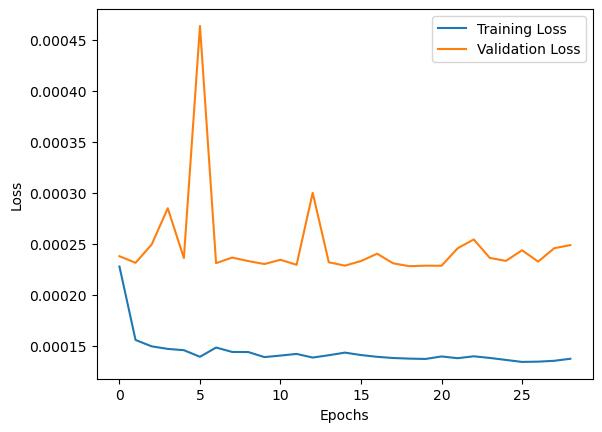

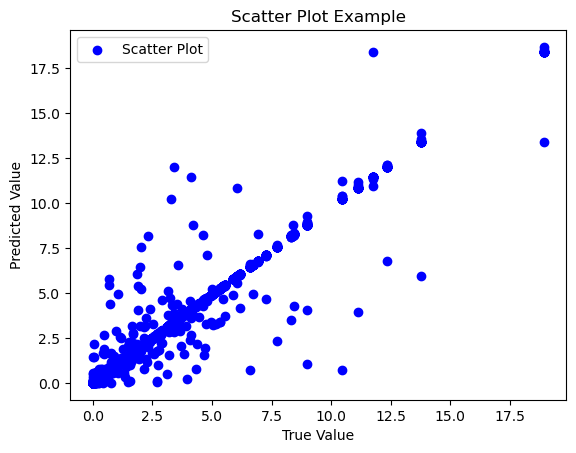

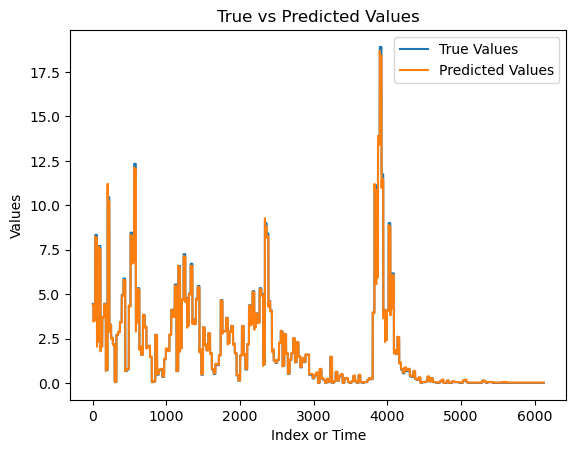

Performance on Different Metrics
RMSE: 0.4414497367825432
MAE: 0.08451611584243302
MSE: 0.19487787010537663
R2: 0.973192022292194


In [39]:
# Make predictions on the test set
y_pred_scaled = model_hybrid_rnn_gru.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_hybrid_rnn_gru = {}
p_hybrid_rnn_gru['RMSE'] = rmse
p_hybrid_rnn_gru['MAE'] = mae
p_hybrid_rnn_gru['MSE'] = mse
p_hybrid_rnn_gru['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_hybrid_rnn_gru.history['loss'], label='Training Loss')
plt.plot(history_model_hybrid_rnn_gru.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
plt.legend()
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Printing performance metrics of the model
print("Performance on Different Metrics")
for key, value in p_hybrid_rnn_gru.items():
    print(f'{key}: {value}')

In [40]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the hybrid LSTM-BiLSTM model
model_hybrid_lstm_bilstm = Sequential()
model_hybrid_lstm_bilstm.add(LSTM(100, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model_hybrid_lstm_bilstm.add(Bidirectional(LSTM(100, activation='relu')))
model_hybrid_lstm_bilstm.add(Dense(1))
model_hybrid_lstm_bilstm.compile(optimizer='adam', loss='mse')

print("Hybrid LSTM-BiLSTM\n")
model_hybrid_lstm_bilstm.summary()
print("\n")

# Train the model with early stopping
history_model_hybrid_lstm_bilstm = model_hybrid_lstm_bilstm.fit(X_train, y_train, 
                                                                epochs=evalue, 
                                                                batch_size=32,
                                                                validation_data=(X_val, y_val), 
                                                                verbose=2,
                                                                callbacks=[early_stopping])

Hybrid LSTM-BiLSTM

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 100)          40800     
                                                                 
 bidirectional_2 (Bidirecti  (None, 200)               160800    
 onal)                                                           
                                                                 
 dense_7 (Dense)             (None, 1)                 201       
                                                                 
Total params: 201801 (788.29 KB)
Trainable params: 201801 (788.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
575/575 - 106s - loss: 6.1462e-04 - val_loss: 5.8193e-04 - 106s/epoch - 184ms/step
Epoch 2/200
575/575 - 104s - loss: 2.8241e-04 - val_loss: 4.0227e-04 - 104s/epoch - 181ms/step


192/192 [==============================] - 8s 38ms/step


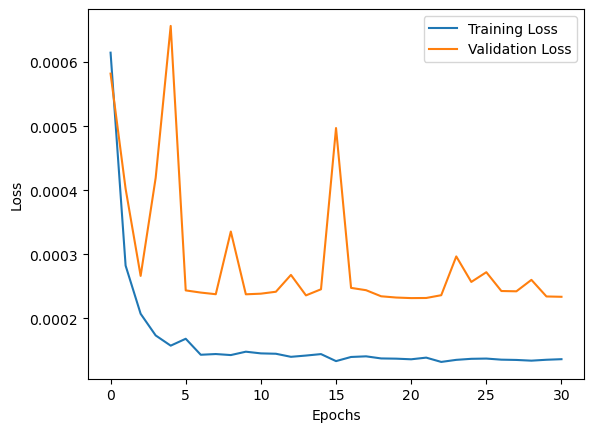

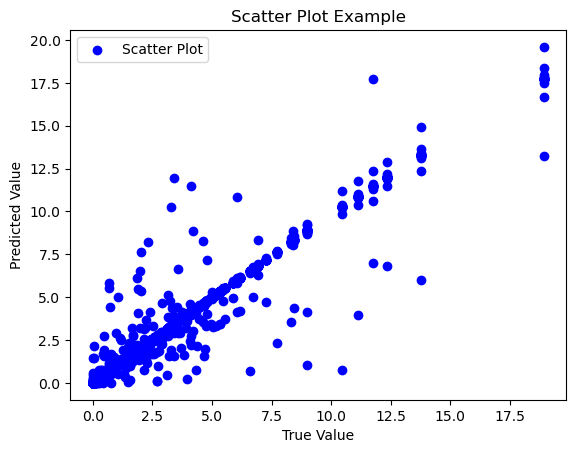

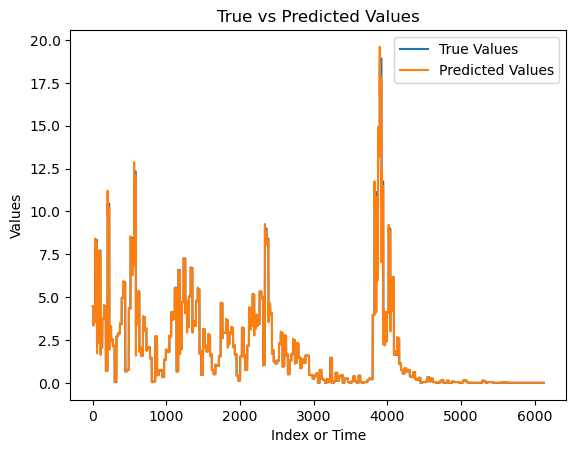

Performance on Different Metrics
RMSE: 0.4537375938860952
MAE: 0.07695910514982937
MSE: 0.20587780410554307
R2: 0.9716788387516292


In [41]:
# Make predictions on the test set
y_pred_scaled = model_hybrid_lstm_bilstm.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_hybrid_lstm_bilstm = {}
p_hybrid_lstm_bilstm['RMSE'] = rmse
p_hybrid_lstm_bilstm['MAE'] = mae
p_hybrid_lstm_bilstm['MSE'] = mse
p_hybrid_lstm_bilstm['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_hybrid_lstm_bilstm.history['loss'], label='Training Loss')
plt.plot(history_model_hybrid_lstm_bilstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
plt.legend()
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Printing performance metrics of the model
print("Performance on Different Metrics")
for key, value in p_hybrid_lstm_bilstm.items():
    print(f'{key}: {value}')

In [42]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the hybrid LSTM-GRU model
model_hybrid_lstm_gru = Sequential()
model_hybrid_lstm_gru.add(LSTM(100, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model_hybrid_lstm_gru.add(GRU(100, activation='relu'))
model_hybrid_lstm_gru.add(Dense(1))
model_hybrid_lstm_gru.compile(optimizer='adam', loss='mse')

print("Hybrid LSTM-GRU\n")
model_hybrid_lstm_gru.summary()
print("\n")

# Train the model with early stopping
history_model_hybrid_lstm_gru = model_hybrid_lstm_gru.fit(X_train, y_train, 
                                                          epochs=evalue, 
                                                          batch_size=32,
                                                          validation_data=(X_val, y_val), 
                                                          verbose=2,
                                                          callbacks=[early_stopping])


Hybrid LSTM-GRU

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 100)          40800     
                                                                 
 gru_2 (GRU)                 (None, 100)               60600     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 101501 (396.49 KB)
Trainable params: 101501 (396.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
575/575 - 69s - loss: 4.0596e-04 - val_loss: 3.6370e-04 - 69s/epoch - 120ms/step
Epoch 2/200
575/575 - 67s - loss: 2.0143e-04 - val_loss: 2.7358e-04 - 67s/epoch - 116ms/step
Epoch 3/200
575/575 - 67s - loss: 1.5447e-04 - val_loss: 2.5695e-04 - 67s

192/192 [==============================] - 6s 31ms/step


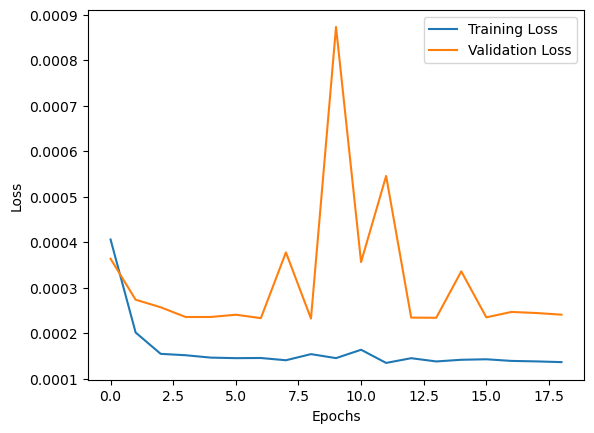

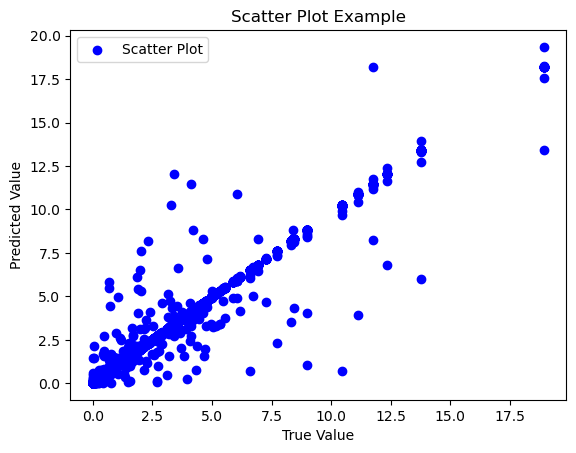

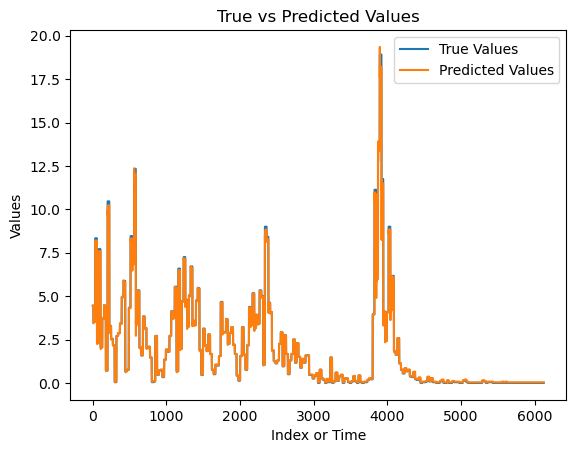

Performance on Different Metrics
RMSE: 0.44660542741840137
MAE: 0.08833928795080839
MSE: 0.19945640779957297
R2: 0.9725621850696607


In [43]:
# Make predictions on the test set
y_pred_scaled = model_hybrid_lstm_gru.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_hybrid_lstm_gru = {}
p_hybrid_lstm_gru['RMSE'] = rmse
p_hybrid_lstm_gru['MAE'] = mae
p_hybrid_lstm_gru['MSE'] = mse
p_hybrid_lstm_gru['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_hybrid_lstm_gru.history['loss'], label='Training Loss')
plt.plot(history_model_hybrid_lstm_gru.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
plt.legend()
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Printing performance metrics of the model
print("Performance on Different Metrics")
for key, value in p_hybrid_lstm_gru.items():
    print(f'{key}: {value}')

In [46]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the hybrid BiLSTM-GRU model
model_hybrid_bilstm_gru = Sequential()
model_hybrid_bilstm_gru.add(Bidirectional(LSTM(100, activation='relu', input_shape=(sequence_length, 1), return_sequences=True)))
model_hybrid_bilstm_gru.add(GRU(100, activation='relu'))
model_hybrid_bilstm_gru.add(Dense(1))
model_hybrid_bilstm_gru.compile(optimizer='adam', loss='mse')

# Train the model with early stopping
history_model_hybrid_bilstm_gru = model_hybrid_bilstm_gru.fit(X_train, y_train, 
                                                              epochs=evalue, 
                                                              batch_size=32,
                                                              validation_data=(X_val, y_val), 
                                                              verbose=2,
                                                              callbacks=[early_stopping])


Epoch 1/200
575/575 - 86s - loss: 0.0062 - val_loss: 3.8779e-04 - 86s/epoch - 150ms/step
Epoch 2/200
575/575 - 84s - loss: 2.1038e-04 - val_loss: 3.5286e-04 - 84s/epoch - 146ms/step
Epoch 3/200
575/575 - 85s - loss: 1.7578e-04 - val_loss: 3.1520e-04 - 85s/epoch - 147ms/step
Epoch 4/200
575/575 - 85s - loss: 1.6275e-04 - val_loss: 2.6906e-04 - 85s/epoch - 147ms/step
Epoch 5/200
575/575 - 84s - loss: 1.5993e-04 - val_loss: 2.6275e-04 - 84s/epoch - 147ms/step
Epoch 6/200
575/575 - 85s - loss: 1.5418e-04 - val_loss: 2.9164e-04 - 85s/epoch - 148ms/step
Epoch 7/200
575/575 - 85s - loss: 1.5023e-04 - val_loss: 2.7445e-04 - 85s/epoch - 147ms/step
Epoch 8/200
575/575 - 85s - loss: 1.4941e-04 - val_loss: 2.4466e-04 - 85s/epoch - 148ms/step
Epoch 9/200
575/575 - 85s - loss: 1.4447e-04 - val_loss: 2.4080e-04 - 85s/epoch - 148ms/step
Epoch 10/200
575/575 - 86s - loss: 1.4478e-04 - val_loss: 2.5259e-04 - 86s/epoch - 149ms/step
Epoch 11/200
575/575 - 86s - loss: 1.4267e-04 - val_loss: 2.3683e-04 - 86

192/192 [==============================] - 9s 43ms/step


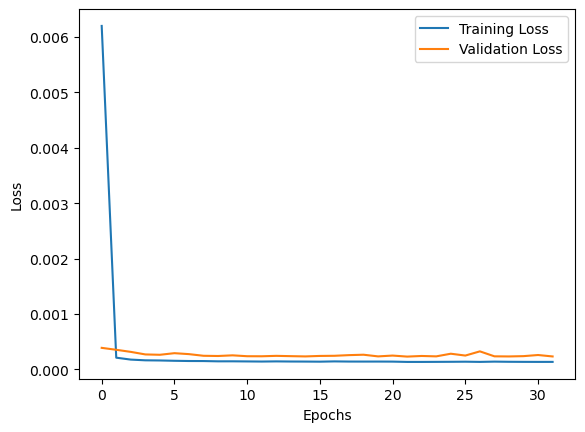

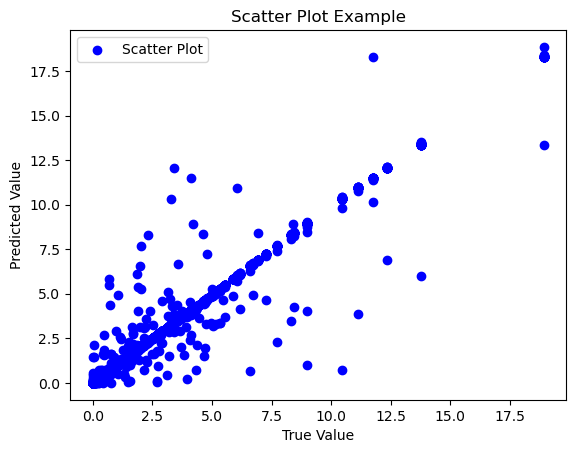

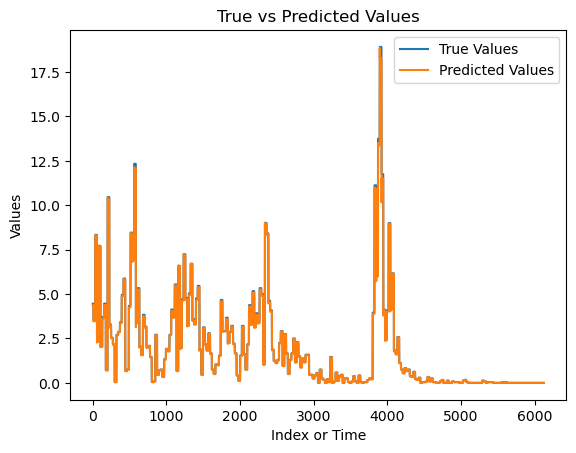

Performance on Different Metrics
RMSE: 0.44371007559363024
MAE: 0.07683241682567478
MSE: 0.19687863118330504
R2: 0.9729167916652032


In [47]:
# Make predictions on the test set
y_pred_scaled = model_hybrid_bilstm_gru.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_hybrid_bilstm_gru = {}
p_hybrid_bilstm_gru['RMSE'] = rmse
p_hybrid_bilstm_gru['MAE'] = mae
p_hybrid_bilstm_gru['MSE'] = mse
p_hybrid_bilstm_gru['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_hybrid_bilstm_gru.history['loss'], label='Training Loss')
plt.plot(history_model_hybrid_bilstm_gru.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
plt.legend()
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Printing performance metrics of the model
print("Performance on Different Metrics")
for key, value in p_hybrid_bilstm_gru.items():
    print(f'{key}: {value}')

In [48]:
from prettytable import PrettyTable

# Create a PrettyTable object
p_table_c1 = PrettyTable()

# Define the table headers including MSE
p_table_c1.field_names = ["Model", "RMSE", "MAE", "MSE", "R2"]

# Add data to the table including MSE
p_table_c1.add_row(["RNN", p_rnn_c1['RMSE'], p_rnn_c1['MAE'], p_rnn_c1['MSE'], p_rnn_c1['R2']])
p_table_c1.add_row(["LSTM", p_lstm_c1['RMSE'], p_lstm_c1['MAE'], p_lstm_c1['MSE'], p_lstm_c1['R2']])
p_table_c1.add_row(["BiLSTM", p_bilstm_c1['RMSE'], p_bilstm_c1['MAE'], p_bilstm_c1['MSE'], p_bilstm_c1['R2']])
p_table_c1.add_row(["GRU", p_gru_c1['RMSE'], p_gru_c1['MAE'], p_gru_c1['MSE'], p_gru_c1['R2']])
p_table_c1.add_row(["Hybrid RNN-LSTM", p_hybrid_rnn_lstm['RMSE'], p_hybrid_rnn_lstm['MAE'], p_hybrid_rnn_lstm['MSE'], p_hybrid_rnn_lstm['R2']])
p_table_c1.add_row(["Hybrid RNN-BiLSTM", p_hybrid_rnn_bilstm['RMSE'], p_hybrid_rnn_bilstm['MAE'], p_hybrid_rnn_bilstm['MSE'], p_hybrid_rnn_bilstm['R2']])
p_table_c1.add_row(["Hybrid RNN-GRU", p_hybrid_rnn_gru['RMSE'], p_hybrid_rnn_gru['MAE'], p_hybrid_rnn_gru['MSE'], p_hybrid_rnn_gru['R2']])
p_table_c1.add_row(["Hybrid LSTM-BiLSTM", p_hybrid_lstm_bilstm['RMSE'], p_hybrid_lstm_bilstm['MAE'], p_hybrid_lstm_bilstm['MSE'], p_hybrid_lstm_bilstm['R2']])
p_table_c1.add_row(["Hybrid LSTM-GRU", p_hybrid_lstm_gru['RMSE'], p_hybrid_lstm_gru['MAE'], p_hybrid_lstm_gru['MSE'], p_hybrid_lstm_gru['R2']])
p_table_c1.add_row(["Hybrid BiLSTM-GRU", p_hybrid_bilstm_gru['RMSE'], p_hybrid_bilstm_gru['MAE'], p_hybrid_bilstm_gru['MSE'], p_hybrid_bilstm_gru['R2']])

# Set table properties (optional)
p_table_c1.align["Model"] = "l"  # Left-align the 'Model' column

# Print the table
print(p_table_c1)

+--------------------+---------------------+---------------------+---------------------+--------------------+
| Model              |         RMSE        |         MAE         |         MSE         |         R2         |
+--------------------+---------------------+---------------------+---------------------+--------------------+
| RNN                |  0.4414247937316643 | 0.06990478905553872 | 0.19485584852104237 | 0.9731950516466384 |
| LSTM               | 0.44146463613196935 | 0.07332896330656889 |  0.1948910249551321 | 0.973190212672052  |
| BiLSTM             |  0.4457803573847824 | 0.07821122354731642 |  0.1987201270301043 | 0.9726634700356959 |
| GRU                |  0.4421090320544449 | 0.07225904653316481 |  0.1954603962241182 | 0.9731118882718612 |
| Hybrid RNN-LSTM    | 0.44490371439636495 | 0.07844684964224599 | 0.19793931508368226 | 0.9727708808424865 |
| Hybrid RNN-BiLSTM  |  0.4398843038638257 | 0.08991449796936336 | 0.19349820078576255 | 0.9733818136951089 |
| Hybrid R

In [49]:
# Define performance metrics for each model
models_metrics = {
    "RNN": {"RMSE": p_rnn_c1['RMSE'], "MAE": p_rnn_c1['MAE'], "MSE": p_rnn_c1['MSE'], "R2": p_rnn_c1['R2']},
    "LSTM": {"RMSE": p_lstm_c1['RMSE'], "MAE": p_lstm_c1['MAE'], "MSE": p_lstm_c1['MSE'], "R2": p_lstm_c1['R2']},
    "BiLSTM": {"RMSE": p_bilstm_c1['RMSE'], "MAE": p_bilstm_c1['MAE'], "MSE": p_bilstm_c1['MSE'], "R2": p_bilstm_c1['R2']},
    "GRU": {"RMSE": p_gru_c1['RMSE'], "MAE": p_gru_c1['MAE'], "MSE": p_gru_c1['MSE'], "R2": p_gru_c1['R2']},
    "Hybrid RNN-LSTM": {"RMSE": p_hybrid_rnn_lstm['RMSE'], "MAE": p_hybrid_rnn_lstm['MAE'], "MSE": p_hybrid_rnn_lstm['MSE'], "R2": p_hybrid_rnn_lstm['R2']},
    "Hybrid RNN-BiLSTM": {"RMSE": p_hybrid_rnn_bilstm['RMSE'], "MAE": p_hybrid_rnn_bilstm['MAE'], "MSE": p_hybrid_rnn_bilstm['MSE'], "R2": p_hybrid_rnn_bilstm['R2']},
    "Hybrid RNN-GRU": {"RMSE": p_hybrid_rnn_gru['RMSE'], "MAE": p_hybrid_rnn_gru['MAE'], "MSE": p_hybrid_rnn_gru['MSE'], "R2": p_hybrid_rnn_gru['R2']},
    "Hybrid LSTM-BiLSTM": {"RMSE": p_hybrid_lstm_bilstm['RMSE'], "MAE": p_hybrid_lstm_bilstm['MAE'], "MSE": p_hybrid_lstm_bilstm['MSE'], "R2": p_hybrid_lstm_bilstm['R2']},
    "Hybrid LSTM-GRU": {"RMSE": p_hybrid_lstm_gru['RMSE'], "MAE": p_hybrid_lstm_gru['MAE'], "MSE": p_hybrid_lstm_gru['MSE'], "R2": p_hybrid_lstm_gru['R2']},
    "Hybrid BiLSTM-GRU": {"RMSE": p_hybrid_bilstm_gru['RMSE'], "MAE": p_hybrid_bilstm_gru['MAE'], "MSE": p_hybrid_bilstm_gru['MSE'], "R2": p_hybrid_bilstm_gru['R2']}
}

# Define the weights for each metric (lower RMSE and MAE, higher R2 is better)
weights = {"RMSE": -1, "MAE": -1, "MSE": -1, "R2": 1}

# Calculate the score for each model
model_scores = {}
for model, metrics in models_metrics.items():
    score = 0
    for metric, value in metrics.items():
        score += value * weights[metric]
    model_scores[model] = score

# Sort the models based on their score
sorted_models = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Assign Friedman ranking to each model based on their sorted order
friedman_ranking = {}
for i, (model, _) in enumerate(sorted_models):
    friedman_ranking[model] = i + 1

# Print Friedman ranking of each model
print("Friedman Ranking:")
for model, rank in friedman_ranking.items():
    print(f"{model}: {rank}")

Friedman Ranking:
RNN: 1
LSTM: 2
GRU: 3
Hybrid BiLSTM-GRU: 4
Hybrid RNN-GRU: 5
Hybrid RNN-LSTM: 6
Hybrid RNN-BiLSTM: 7
BiLSTM: 8
Hybrid LSTM-GRU: 9
Hybrid LSTM-BiLSTM: 10


In [50]:
# Create a DataFrame from the dictionary
df_metrics = pd.DataFrame(models_metrics).T

# Save DataFrame to a CSV file
df_metrics.to_csv('madhya_pradesh_metrics_c1.csv')